In [0]:
import os
import time
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train = pd.read_csv("/content/gdrive/My Drive/DashGC/Original/jester-v1-train.csv", sep = ';', names = ("video_id", "labels", "frames"))
val = pd.read_csv("/content/gdrive/My Drive/DashGC/Original/jester-v1-validation.csv", sep = ';', names = ("video_id", "labels", "frames"))
test = pd.read_csv("/content/gdrive/My Drive/DashGC/Original/jester-v1-test.csv", names = ("id", "frames"))

In [4]:
# Decompress the compressed "Jester" dataset in Google Colab VM

start = time.time()
!cat /content/gdrive/My\ Drive/DashGC/Original/20bn-jester-v1-* | tar -xz
stop = time.time()
print('Decompression took', round(((stop - start) / 60), 2), 'mins')

Decompression took 11.89 mins


In [0]:
train["frames"] = train["video_id"].map(lambda a: len(os.listdir("/content/20bn-jester-v1/" + str(a))))
val["frames"] = val["video_id"].map(lambda a: len(os.listdir("/content/20bn-jester-v1/" + str(a))))
test["frames"] = test["id"].map(lambda a: len(os.listdir("/content/20bn-jester-v1/" + str(a))))

In [6]:
train.sort_values("video_id").head()

,video_id,labels,frames
97184,1,Doing other things,37
111045,3,Pushing Two Fingers Away,37
59351,4,Swiping Right,30
36296,5,Rolling Hand Backward,35
82397,6,Drumming Fingers,37


In [7]:
val.sort_values("video_id").head()

,video_id,labels,frames
13384,16,Thumb Down,35
4085,22,Zooming In With Full Hand,37
9273,23,Sliding Two Fingers Right,38
14519,30,Swiping Down,37
3502,35,Drumming Fingers,36


In [8]:
test.sort_values("id").head()

,id,frames
9742,2,37
117,15,33
12528,18,32
13234,21,37
12684,32,36


In [9]:
train.describe()

,video_id,frames
count,118562.000000,118562.000000
mean,74014.563663,35.586023
std,42788.066743,2.355016
min,1.000000,12.000000
25%,36858.250000,35.000000
50%,74009.500000,36.000000
75%,111111.500000,37.000000
max,148092.000000,70.000000


In [10]:
val.describe()

,video_id,frames
count,14787.000000,14787.000000
mean,74259.369987,36.016636
std,42597.398716,1.859350
min,16.000000,13.000000
25%,37732.000000,36.000000
50%,74275.000000,37.000000
75%,111037.500000,37.000000
max,148080.000000,67.000000


In [11]:
test.describe()

,id,frames
count,14743.000000,14743.000000
mean,74089.824120,35.803636
std,42604.755169,2.250138
min,2.000000,13.000000
25%,37441.000000,35.000000
50%,74177.000000,37.000000
75%,110787.500000,37.000000
max,148087.000000,46.000000


In [0]:
train.sort_values("video_id").to_csv("/content/gdrive/My Drive/DashGC/Reorganized/Train.csv", sep = ",", index = False, encoding = "utf-8")
val.sort_values("video_id").to_csv("/content/gdrive/My Drive/DashGC/Reorganized/Validation.csv", sep = ",", index = False, encoding = "utf-8")
test.sort_values("id").to_csv("/content/gdrive/My Drive/DashGC/Reorganized/Test.csv", sep = ",", index = False, encoding = "utf-8")

In [13]:
train.groupby(by = "labels").size()

labels
Doing other things               9592
Drumming Fingers                 4371
No gesture                       4278
Pulling Hand In                  4323
Pulling Two Fingers In           4267
Pushing Hand Away                4357
Pushing Two Fingers Away         4291
Rolling Hand Backward            4032
Rolling Hand Forward             4132
Shaking Hand                     4258
Sliding Two Fingers Down         4348
Sliding Two Fingers Left         4292
Sliding Two Fingers Right        4206
Sliding Two Fingers Up           4219
Stop Sign                        4337
Swiping Down                     4259
Swiping Left                     4162
Swiping Right                    4084
Swiping Up                       4220
Thumb Down                       4390
Thumb Up                         4373
Turning Hand Clockwise           3216
Turning Hand Counterclockwise    3398
Zooming In With Full Hand        4251
Zooming In With Two Fingers      4302
Zooming Out With Full Hand       4281
Zoomi

In [14]:
val.groupby(by = "labels").size()

labels
Doing other things               1468
Drumming Fingers                  535
No gesture                        533
Pulling Hand In                   526
Pulling Two Fingers In            519
Pushing Hand Away                 538
Pushing Two Fingers Away          531
Rolling Hand Backward             493
Rolling Hand Forward              521
Shaking Hand                      528
Sliding Two Fingers Down          531
Sliding Two Fingers Left          519
Sliding Two Fingers Right         516
Sliding Two Fingers Up            522
Stop Sign                         536
Swiping Down                      520
Swiping Left                      494
Swiping Right                     486
Swiping Up                        508
Thumb Down                        536
Thumb Up                          539
Turning Hand Clockwise            385
Turning Hand Counterclockwise     399
Zooming In With Full Hand         526
Zooming In With Two Fingers       522
Zooming Out With Full Hand        526
Zoomi

In [15]:
train.groupby(by = "frames").size()

frames
12        2
13        6
14        2
15        5
16        4
17        5
18        7
19       55
20       45
21       39
22      103
23      542
24      184
25      247
26      202
27      157
28      284
29      419
30      795
31     1704
32     5305
33     9702
34     9122
35     9375
36    22567
37    50420
38     6135
39      820
40      153
41       43
42       30
43       12
44       15
45       14
46       10
47        8
48        7
49        3
50        3
51        3
53        1
54        1
56        2
62        1
63        1
69        1
70        1
dtype: int64

In [16]:
val.groupby(by = "frames").size()

frames
13       1
14       1
20       2
21       2
22       2
23      13
24      22
25       1
26       8
27       3
28      14
29      23
30      74
31     120
32     491
33     822
34     827
35    1113
36    3143
37    7047
38     933
39      88
40      15
41       4
42       7
43       1
44       4
46       2
49       1
51       1
65       1
67       1
dtype: int64

In [17]:
test.groupby(by = "frames").size()

frames
13       2
14      10
15       4
16       7
17       3
18       2
19       1
21       5
22       7
23      28
24      41
25      16
26       6
27      14
28      54
29      33
30      79
31     176
32     489
33    1031
34     854
35    1040
36    3003
37    6981
38     740
39      86
40      14
42       4
43       3
44       4
45       2
46       4
dtype: int64

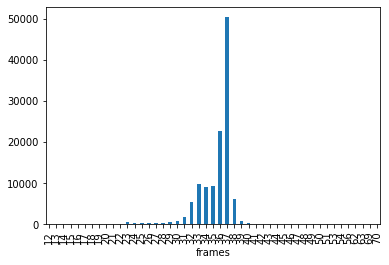

In [18]:
train.groupby(by = "frames").size().plot.bar()

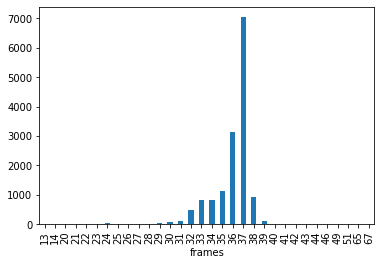

In [19]:
val.groupby(by = "frames").size().plot.bar()

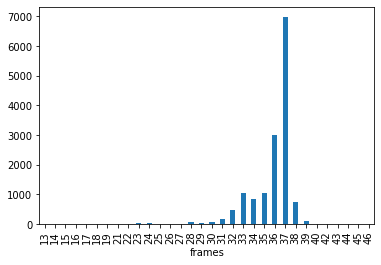

In [20]:
test.groupby(by = "frames").size().plot.bar()

In [21]:
train.groupby(by = "frames").size().describe()

count       47.000000
mean      2522.595745
std       8193.762351
min          1.000000
25%          3.500000
50%         30.000000
75%        351.500000
max      50420.000000
dtype: float64

In [22]:
val.groupby(by = "frames").size().describe()

count      32.000000
mean      462.093750
std      1349.372981
min         1.000000
25%         1.750000
50%         7.500000
75%        96.000000
max      7047.000000
dtype: float64

In [23]:
test.groupby(by = "frames").size().describe()

count      32.000000
mean      460.718750
std      1328.019098
min         1.000000
25%         4.000000
50%        14.000000
75%       108.500000
max      6981.000000
dtype: float64